In [1]:
import numpy as np
import xarray as xr
import rfmtools
import matplotlib.pyplot as plt

In [2]:
heights = rfmtools.make_grid._get_height_array(dz=1000)

In [3]:
temp, h2o, pres = rfmtools.make_grid._get_temp_h2o_pres_from_height(height_array=heights, Ts=300, Tstrat=200)

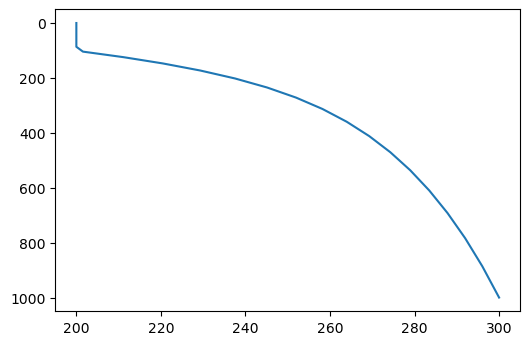

In [4]:
plt.figure(dpi=100)
plt.plot(temp, pres)
plt.gca().invert_yaxis()

In [5]:
rfmtools.make_input_files.generate_atm_file(fname='fulltest_dz1km.atm', height=heights/1000, temp=temp, h2o=h2o, pres=pres, co2=288)

In [6]:
rfmtools.make_input_files.make_driver(
    runtype='radiance',
    fname='rfm.drv', 
    atmfile='fulltest_dz1km.atm', 
    SPC="0.1 1500 0.1",
    GAS="CO2",
    HIT=rfmtools.utils.RFM_DIR+"/hit/hitran_2016.bin")

*HDR
*FLG
*SPC
*GAS
*ATM
*LEV
*HIT
*OUT


In [7]:
rfmtools.utils.RFM_DIR

'/gws/nopw/j04/aopp/andreww/side_projects/RFM'

In [8]:
da = rfmtools.run.run(drv_file=rfmtools.utils.RFM_DIR+"/src/rfm.drv")
da

Running RFM...
RFM run successful!


<xarray.DataArray (wavenumber: 15000)>
array([7.73175799e-08, 3.09268358e-07, 6.95846381e-07, ...,
       9.49860513e-02, 9.49594602e-02, 9.49328691e-02])
Coordinates:
  * wavenumber  (wavenumber) float64 0.1 0.2 0.3 0.4 ... 1.5e+03 1.5e+03 1.5e+03

Text(0, 0.5, 'Radiance [W/m2/cm-1]')

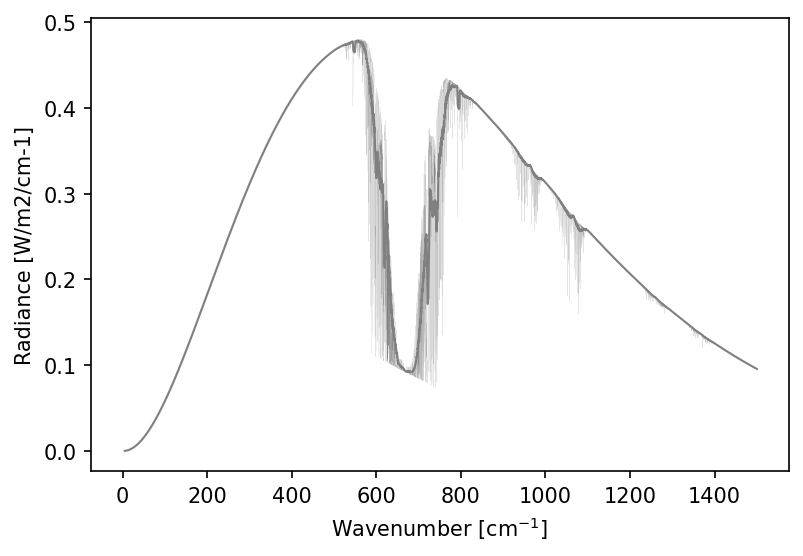

In [12]:
fig, ax = plt.subplots(dpi=150)

da.plot(ax=ax, lw=0.05, color='black', alpha=0.5)
da.rolling(wavenumber=50).mean().plot(ax=ax, lw=1, color='grey')
ax.set_xlabel('Wavenumber [cm$^{-1}$]')
ax.set_ylabel('Radiance [W/m2/cm-1]')